## Assignment 4
__Students:__

1. 21010294 - Duong Doan Tung
2. 21012745 - Pham Van Cong
3. 20111004 - Le Hoang Nam

__Programming language used:__  Python

__Programming environment used:__  Jupyter Notebook

---

Run the following cell to import the required libraries.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random

#### Part 1

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.093350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.005516
[t-SNE] KL divergence after 1000 iterations: 0.600956


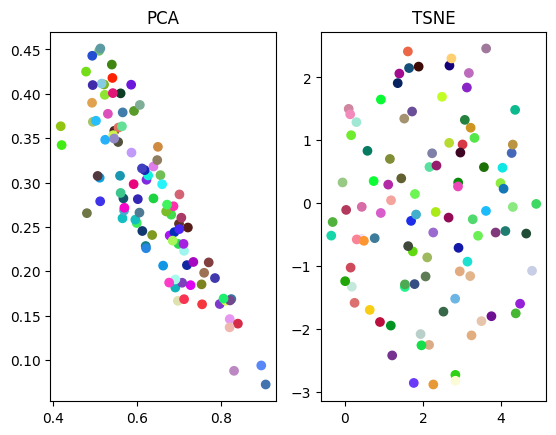

In [54]:
#Draw and visualize randomly 100 samples with size (4,5) from a uniform distribution in 
#the half-open [2,5)
#a)
def PlotPCA(X):
    X_pca = None
    for i in range(100):
        pca = PCA(n_components=2)
        Xi = X[i, :]
        pca.fit(Xi)
        if not X_pca is None:
            X_pca = np.vstack((X_pca, pca.explained_variance_ratio_))
        else:
            X_pca = pca.explained_variance_ratio_
    return X_pca

X = np.random.uniform(2,5,(100,4,5))
X_pca = PlotPCA(X)
#random color map
subplot = plt.subplot(1,2,1)

subplot.set_title("PCA")
subplot.scatter(X_pca[:,0], X_pca[:,1], c=np.random.rand(100,3))
def PlotTSNE(X):
    X_TNSE = None
    tnse = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
    X_TNSE = tnse.fit_transform(X)
    return X_TNSE
X = np.random.uniform(2,5,(100,4,5)).reshape(100,20)
X_TNSE = PlotTSNE(X)
subplot = plt.subplot(1,2,2)
subplot.set_title("TSNE")
subplot.scatter(X_TNSE[:,0], X_TNSE[:,1], c=np.random.rand(100,3))

plt.show()


    




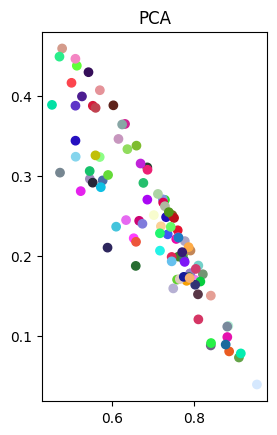

In [61]:
#b) 

#X_multinominal with size (100,4,5) with multinominal distribution with 6 classes
X_multinominal = np.random.multinomial(100, [1/6]*5, size=(100,4))
X_multinominal_pca = PlotPCA(X_multinominal)
subplot = plt.subplot(1,2,1)
subplot.set_title("PCA")
subplot.scatter(X_multinominal_pca[:,0], X_multinominal_pca[:,1], c=np.random.rand(100,3))


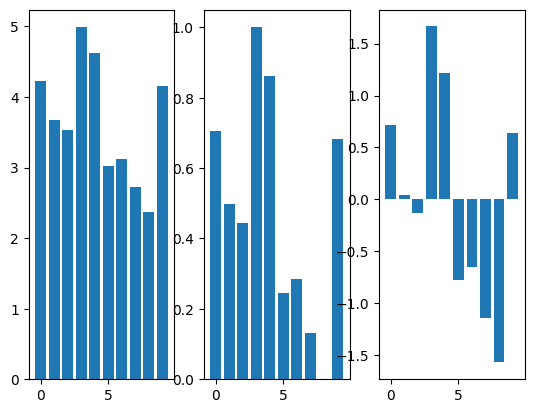

In [56]:
def min_max_norm(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
def z_score_norm(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X = np.random.uniform(2,5,(10))
X_norm_1 = min_max_norm(X)
X_norm_2 = z_score_norm(X)
plt.subplot(1,3,1)
plt.bar(np.arange(10), X)
plt.subplot(1,3,2)
plt.bar(np.arange(10), X_norm_1)
plt.subplot(1,3,3)
plt.bar(np.arange(10), X_norm_2)
plt.show()